<h1><center>Physique numérique (PHY-3500)</center></h1>
<h1><center>TP2 - Résolution d'équations non-linéaires</center></h1>

## Nom des membres de l'équipe :

### Nom, Prénom :  NI 
### Légaré, Ophélie : 111 182 608
### Parrot, Anaïs : 111 184 980
### Turgeon, David : 111 182 265

### Importation des modules :

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction : 

De nombreux principes sont décrits par des équations non-linéaires; tels que le volume d'un gaz à faible pression selon la relation de Van der Waal, le mouvement des fluides newtoniens selon les équations de Navier-Stokes en mécanique des fluides ou le nombre d'individus dans une population selon sa vitesse d'évolution pour n'en nommer que quelques-uns. Il s'agit d'équations pour lesquelles un certain nombre d'itérations sont requises afin de converger vers la solution. Il est donc d'usage d'avoir recours à des méthodes numériques pour les résoudre.

Dans cette étude, quatre méthodes numériques sont présentées et comparées entre elles soit les méthodes de la bissection et de la sécante, puis les méthodes de la relaxation et de la relaxation accélérée. Tout d'abord, les énergies des états vibrationnels d'une molécule diatomique neutre d'oxygène sont calculées selon la modélisation semi-classique du potentiel de Lennard-Jones et la quantification de Bohr-Sommerfeld. La vitesse de convergence vers l'énergie des états vibrationnels est comparée pour les méthodes de la bissection et de la sécante. Par la suite, le pourcentage de la population infectée au terme de la pandémie de la COVID-19 est évalué à l'aide de l'équation de la modélisation des pandémies. La vitesse de convergence vers le pourcentage est comparée pour les méthodes de relaxation et de relaxation accélérée.

# Le potentiel de Lennard-Jones

Le potentiel de Lennard-Jones, aussi nommé le potentiel 6-12, permet de modéliser les états vibrationnels des molécules diatomiques neutres. Il est exprimé par 
$$V(r) = 4 V_0 \left [\left(\frac{\sigma}{r} \right)^{12} - \left(\frac{\sigma}{r} \right)^6 \right],$$
où $V_0$ est une constante d'énergie qui représente la profondeur du puits de potentiel, $\sigma$ est la longueur caractéristique d'une molécule donnée et $r$ est la séparation inter-nucléaire de la molécule diatomique.

En tenant compte de la quantification de Bohr-Sommerfeld qui veut que l'action classique soit un multiple demi-entier de $2π$ pour certaines énergies discrètes $E_n$, on obtient l'action 

\begin{align}
s(\epsilon_n) = \frac{1}{2} S(\epsilon_n V_0) = \gamma \int_{x-}^{x+} \left [\epsilon_n - v(x) \right]^{1/2} dx =  (n + 1/2)π
\end{align}

et le potentiel

\begin{align}
v(x) = 4 \left [\left(\frac{1}{x} \right)^{12} - \left(\frac{1}{x} \right)^6 \right].
\end{align}

Les variables adimensionnelles utilisées sont 

\begin{align}
\epsilon = \frac{E}{V_0},
\end{align}

\begin{align}
x = \frac{r}{\sigma}
\end{align}

et 

\begin{align}
\gamma = \left(\frac{2 \mu \sigma^2 V_0}{\hbar^2} \right)^{1/2}.
\end{align}

## Question 1 :
Les points de rebroussement, soit les bornes de l'intégrale de l'équation de l'action, sont détermniées en fonction de l'énergie $\epsilon_n$. Ces points de rebroussement se situe lorsque l'impulsion locale p(r) est nulle.

$$p(r) = ±[2\mu(\epsilon_n V0-V(r))]^{1/2}$$

Pour pouvoir déterminé les zéros de cette fonction on peut seulement considéré la parenthèse $(\epsilon_n\cdot V0-V(r))$ qui est l'élément variable de la fonction. Ainsi il reste à déterminer lorsque $\epsilon_n V_0 = V(r)$.

$$ 
\epsilon_nV_0 = 4 V_0 \left [\left(\frac{\sigma}{r} \right)^{12} - \left(\frac{\sigma}{r} \right)^6 \right] \\
$$
Si on applique la substitution $\left(\frac{\sigma}{r} \right)^{6} = y^{-1}$,
$$
\epsilon_n = 4\left(y^{-2}-y^{-1}\right) \\
\epsilon_n y^2 = 4(1-y) \\
\epsilon_n y^2 +4y + 4 = 0 \\
y = \frac{-4\pm\sqrt{16-4\cdot-4\cdot\epsilon_n}}{2\epsilon_n} \\
y = \frac{-2\pm2\sqrt{1+\epsilon_n}}{\epsilon_n}\\
r = \sigma\left(\frac{-2\pm2\sqrt{1+\epsilon_n}}{\epsilon_n}\right)^{1/6}
$$

Ainsi les points de rebroussement se retrouveront à $\sigma\left(\frac{-2\pm2\sqrt{1+\epsilon_n}}{\epsilon_n}\right)^{1/6}$.

In [14]:
rebroussement_pts = lambda sigma,epsilon_n :(sigma*((-2+2*(1+epsilon_n)**0.5)/epsilon_n)**(1/6),
                                             sigma*((-2-2*(1+epsilon_n)**0.5)/epsilon_n)**(1/6))


## Question 2 :
On cherche l'énergie $\epsilon$ en fonciton de l'état vibrationnel $n$ d'une molécule et de la valeur $\gamma$ qui lui est propre, et cela avec une précision de 10$^{-8}$.

In [15]:
from scipy.integrate import quad

def bissection(a,b,prec,fonction,val = 0,*args): # val est pour trouver une valeur autre que 0
    if (fonction(a,*args) > val and fonction(b,*args) < val) or (fonction(a,*args) < val and fonction(b,*args) > val):
        if fonction(a,*args) > fonction(b,*args):
            p_0,m_0 = a,b
        else:
            p_0,m_0 = b,a
        x = (a+b)/2
        f_x = fonction(x,*args)
        if (-prec*val+val < f_x) and (f_x < prec*val+val):
            return x
        else:
            if f_x > val:
                return bissection(x,m_0,prec,fonction,val = val,*args)
            else:
                return bissection(x,p_0,prec,fonction,val = val,*args)
    else:
        print(fonction(a,*args),fonction(b,*args))
        raise ValueError(f"La fonction ne passe pas par {val} dans cet intervalle.")

def secante(a,b,prec,fonction,val = 0,*args):
    pass
def integral(epsilon_n):
    v = lambda y: (epsilon_n-4*((y)**(-12)-(y)**(-6)))
    return quad(v,rebroussement_pts(1,epsilon_n)[0],rebroussement_pts(1,epsilon_n)[1],epsrel = 1e-8)[0]
def energie_bissection(n,gamma):
    epsilon_n = bissection(-1,-1e-9,1e-10,integral,val = (n+1/2)*np.pi/gamma)
    return epsilon_n, rebroussement_pts(1,epsilon_n)

## Question 3 :

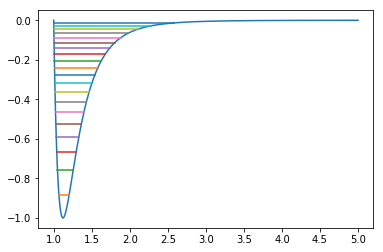

In [16]:

n = np.linspace(1,5,1000)
v = lambda x: 4*((x)**-12-(x)**-6)
plt.plot(n, [v(i) for i in n])
for i in range(0,20):
    plt.plot([energie_bissection(i,150)[1][0],energie_bissection(i,150)[1][1]],[energie_bissection(i,150)[0]]*2)


## Question 4 :

In [17]:
"""
On s'en reparlera xD
"""

"\nOn s'en reparlera xD\n"

# Pandémie et relaxation

Afin de modéliser le nombre de personnes qui seront infectées au terme de la pandémie de la COVID-19, on utilise l'équation :

$$p = 1 - e^{-R_0 p} \ ,$$

où $R_0$ est le nombre de reproduction de base et $p$ le pourcentage de la population qui aura été infecté. Cette équation permet de modéliser n'importe quelle pandémie.

Nous allons essayer ici de déterminer le pourcentage $p$ pour un nombre $R_0$ donné grâce à la méthode de relaxation.

## Question 5 :
On veut évaluer le pourcentage $p$ de la population qui aura ́eté infecté au terme de la pandémie de la COVID-19 grâce à la méthode de la relaxation, et ce, pour un nombre de reproduction de base $R_0$ entre 0 et 5,7 à une précision de 10$^{-6}$.

Pour calculer l'erreur faite sur l'estimation de la solution, il nous faut la dérivée de l'équation utilisée. Dans ce cas, la dérivée est très simple à calculer :
$$ \frac{d}{dx} \left[1-\exp(-R_0 p)\right] = R_0\exp(-R_0 p) $$

L'erreur sur l'estimé se calcule comme :
$$ \epsilon' \approx \frac{x-x'}{1-1/f'(x)} $$

Comme $p$ ne peut être compris que entre 0 et 1, nous choissions aléatoirement $p = 0,1$ comme valeur initiale.

In [18]:
def modele_pandemie(p, R_0):
    # Équation du modèle des pandémies
    return 1 - np.exp(-R_0*p)

def derivee_modele_pandemie(p, R_0):
    # Dérivée de l'équation du modèle des pandémies
    return R_0 * np.exp(-R_0*p)

def erreur_estime(p, R_0, p_prime):
    # Erreur sur l'estimé calculé grâce à la méthode de relaxation
    return (p - p_prime) / (1 - 1/(derivee_modele_pandemie(p, R_0)))

def relaxation(p, R_0, precision):
    # Méthode de relaxation
    p_prime = modele_pandemie(p, R_0)  # Calcul du prochain estimé
    
    nb_iterations = 1
    while abs(erreur_estime(p, R_0, p_prime)) > precision:
        # Calcul du nombre d'itérations nécessaire pour que l'estimé atteigne la précision voulue
        p = p_prime
        p_prime = modele_pandemie(p, R_0)
        nb_iterations += 1 
        
    return p_prime, nb_iterations

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


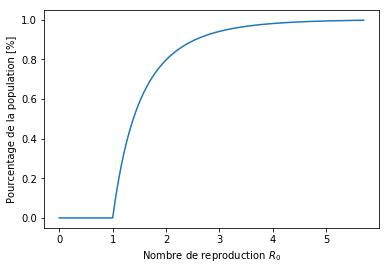

In [19]:
valeurs_R_0 = np.linspace(0, 5.7, 571)

valeurs_p = []
for i in valeurs_R_0:
    valeurs_p.append(relaxation(0.1, i, 10e-6)[0])
    
plt.figure()
plt.plot(valeurs_R_0, valeurs_p)
plt.xlabel("Nombre de reproduction $R_0$")
plt.ylabel("Pourcentage de la population [%]")
plt.show()

Tel qu'attendu, on constate que $p$ varie entre 0 et 1. Lorsque $R_0$ est inférieur à 1, $p$ est environ nul puisque le résultat de l'exponentielle dans l'équation de modélisation des pandémies tend vers 1. $R_0 = 1$ correspond donc au seuil épidémique. 

# Pandémie et relaxation accélérée

On constate à la précédente question que cela prend un certain temps avant que la solution converge avec la précision voulue en utilisant la méthode de relaxation. On va donc recommencer avec la méthode de relaxation accélérée. Cette méthode consiste à prendre l'estimation calculée à chaque itération et à la projeter un peu plus loin en espérant que cela nous rapproche de la vraie solution, ce qui permettrait d'accélérer le processus de relaxation.

## Question 6 :

Le calcul pour obtenir l'erreur sur l'estimé $x'$ de la méthode de relaxation accélérée est présenté ci-dessous. Il s'agit d'une démarche similaire à celui pour la méthode de relaxation.

On cherche la solution $x^*$ de la fonction $f(x)$ évaluée par itérations à différentes valeurs de $x$, soit $x$, $x'$, $x''$ et ainsi de suite. La solution $x^*$ peut être exprimée, pour toutes itérations, par la somme du point d'évaluation de la fonction et de l'erreur $\epsilon$ commise sur cette même itération, tel que :

\begin{align}
x^* = x + \epsilon = x' + \epsilon' = x'' + \epsilon'' , \ etc.
\end{align}

On peut exprimer l'erreur sur la deuxième itération $\epsilon$' par une série de Taylor :

\begin{align}
\epsilon' = x^* - x' = (x^* - x) f'(x^* )\ +\ ...
\end{align}

En négligeant les termes subséquents, cela correspond à 

\begin{align}
\epsilon' = x^* - x' = \epsilon f'(x^* ) \ .
\end{align}

Dans le cas de la relaxation accélérée, le deuxième point d'itération est donné par :

\begin{align}
x' = f(x) = x + (1 + \omega) \Delta x = x + (1 + \omega) (f(x) -x) = (1 + \omega) f(x) - x \omega \ .
\end{align}

Par conséquent,

\begin{align}
f(x^* ) = (1 + \omega) f(x^* ) - x^* \omega\ .
\end{align}

La dérivée par rapport à $x$ de la fonction autour de sa solution $x^*$ est 

\begin{align}
f'(x^* ) = (1 + \omega) f'(x^* ) - \omega\ .
\end{align}

On procède donc à isoler $\epsilon'$ de la première équation.

\begin{align}
x - x' = \epsilon' - \epsilon
\end{align}

\begin{align}
x - x' = \epsilon' - \frac{\epsilon'}{f'(x^* )}
\end{align}

\begin{align}
x - x' = \epsilon' \left [1 - \frac{1}{f'(x^* )} \right]
\end{align}

\begin{align}
x - x' = \epsilon' \left [1 - \frac{1}{(1 + \omega) f'(x^* ) - \omega} \right]
\end{align}

\begin{align}
\epsilon' = \frac{x - x'}{1 - \frac{1}{(1 + \omega) f'(x^* ) - \omega}}
\end{align}

Finalement, en approximant que $x$ est situé près de $x^*$, on a que

\begin{align}
\epsilon' \approx \frac{x - x'}{1 - \frac{1}{(1 + \omega) f'(x) - \omega}}.
\end{align}

## Question 7 :

Afin de comparer la vitesse de convergence de la méthode de relaxation et de la méthode de relaxation accélérée, on regarde le nombre d'itérations nécessaire pour atteindre une précision de $10^{-6}$ avec $R_0 = 2$ pour la précédente équation décrivant un modèle des pandémies.

In [20]:
solution = relaxation(0.1, 2, 10e-6)
print("Il faut", solution[1], "itérations pour atteindre la précision voulue avec la méthode de relaxation. Cela donne p =", solution[0])

Il faut 16 itérations pour atteindre la précision voulue avec la méthode de relaxation. Cela donne p = 0.7968062132149596


## Question 8 :

Pour évaluer la précision de la méthode de relaxation accélérée, on reprend l'équation de l'erreur sur l'estimé $\epsilon'$ démontré à la question 6.

In [21]:
def erreur_estime_accelere(p, p_prime, R_0, omega):
    # Erreur sur l'estimé calculé grâce à la méthode de relaxation accélérée
    long_terme = (1 + omega) * derivee_modele_pandemie(p, R_0) - omega
    return (p - p_prime) / (1 - 1/long_terme)

def relaxation_acceleree(p, R_0, omega, precision):
    # Méthode de relaxation accélérée
    p_prime = (1 + omega) * modele_pandemie(p, R_0) - omega * p   # Calcul du prochain estimé
        
    nb_iterations = 1
    while abs(erreur_estime_accelere(p, p_prime, R_0, omega)) > precision:
        # Calcul du nombre d'itérations nécessaire pour que l'estimé atteigne la précision voulue
        p = p_prime
        p_prime = (1 + omega) * modele_pandemie(p, R_0) - omega * p
        nb_iterations += 1
        
    return p_prime, nb_iterations

On prend le point de départ donné à 0,5 pour $\omega$ et on regarde le nombre d'itérations nécessaire pour atteindre une précision de $10^{-6}$. On augmente alors graduellement la valeur de $\omega$ pour déterminer la valeur optimale de ce paramètre. On teste également de poser $\omega$ à une valeur inférieure à 0,5 pour voir si la valeur optimale ne se trouverait pas plutôt dans cette direction.

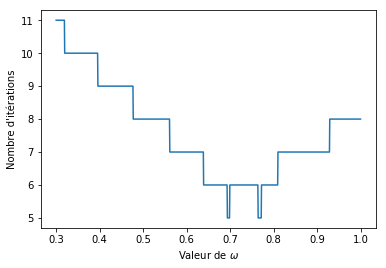

In [22]:
omega = np.linspace(0.3, 1, 1000)

iterations = []
for i in omega:
    iterations.append(relaxation_acceleree(0.1, 2, i, 10e-6)[1])
    
plt.figure()
plt.plot(omega, iterations)
plt.xlabel("Valeur de $\omega$")
plt.ylabel("Nombre d'itérations")
plt.show()

D'après ce graphique, la méthode de relaxation accélérée semble plus rapide lorsque $\omega$ vaut aux alentours de 0,696 et de 0,768. On pose donc que le $\omega$ optimal pour cette fonction est la moyenne de ces deux valeurs, soit à 0,732. On peut ainsi estimer la fonction de modélisation des pandémies avec ce $\omega$ optimal et pour $R_0$ = 2, en souhaitant une précision de $10^{-6}$, et déterminer le nombre d'itérations nécessaire pour y parvenir en partant de $p$ = 0,1.

In [23]:
sln = relaxation_acceleree(0.1, 2, 0.732, 10e-6)
print("Il faut", sln[1], "itérations pour atteindre la précision voulue avec la méthode de relaxation accélérée. Cela donne p =", sln[0])

Il faut 6 itérations pour atteindre la précision voulue avec la méthode de relaxation accélérée. Cela donne p = 0.7968105208881933


Juste avec cet exemple, la méthode de relaxation accélérée a permis de s'épargner 10 itérations supplémentaires pour les mêmes paramètres. La méthode est donc bel et bien plus rapide et donne un estimé semblable pour la précision voulue.

## Question 9 :

Normalement, pour la méthode de relaxation accélérée, on utilise une valeur de $\omega$ supérieure à 0 afin de converger vers la solution. Pour rappel, choisir un $\omega$ égal à 0 revient simplement à la méthode de relaxation. Cependant, dans certains cas, il peut être préférable que $\omega$ soit inférieur à 0 lorsque la méthode ne permet pas autrement de converger vers la solution. On parle, par exemple, lorsque l'estimé calculé oscille entre des valeurs supérieures et inférieures à la solution attendue.

Les prochaines lignes de code présentent un exemple où la méthode de relaxation semble, à priori, dans l'incapacité de converger vers une solution. Pourtant, en utilisant la méthode de relaxation accélérée avec un facteur $\omega$ négatif, il devient finalement possible de converger vers la valeur attendue. 

L'exemple utilise la fonction $x = \exp(1-x^2)$, où la solution est simplement $x = 1$. 

In [24]:
def fct_test(x):
    # Équation qu'on souhaite tester
    return np.exp(1 - x**2)

def relax_acceleree(x, omega, N):      
    # Méthode de relaxation accélérée
    # N représente le nombre maximal d'itérations qu'on souhaite calculer. On n'a pas pris la peine ici
    # d'inclure une précision seuil à atteindre pour les fins de l'exemple. On n'a pas non plus pris la peine 
    # de déterminer quel serait le omega optimal pour cette fonction test.
    
    x_prime = (1 + omega) * fct_test(x) - omega * x   # Calcul du prochain estimé
        
    estime = [x]  # Matrices de tous les estimés calculés grâce à N itérations
    nb_iterations = 1
    while nb_iterations < N:
        estime.append(x_prime)
        x = x_prime
        x_prime = (1 + omega) * fct_test(x) - omega * x
        nb_iterations += 1
        
    return estime

print("Méthode de relaxation :", relax_acceleree(1/2, 0, 10))
print("-")
print("Méthode de relaxation accélérée avec un omega positif :", relax_acceleree(1/2, 0.5, 20))
print("-")
print("Méthode de relaxation accélérée avec un omega négatif :", relax_acceleree(1/2, -0.5, 10))

Méthode de relaxation : [0.5, 2.117000016612675, 0.030755419069985038, 2.715711832754083, 0.0017034651847384463, 2.71827394057758, 0.001679913095081425, 2.7182741571849562, 0.0016799111168229455, 2.7182741572030236]
-
Méthode de relaxation accélérée avec un omega positif : [0.5, 2.925500024919012, -1.461967566177964, 1.2119856842107133, 0.3325336543122769, 3.4843146979755306, -1.742135579121078, 1.0670813829886672, 0.7722417461579775, 1.8597824101406184, -0.8015836989927958, 2.545339579397162, -1.2664079951530562, 1.45330801022112, -0.23335464330333916, 3.9780035948588695, -1.9890012505554808, 1.0725307067606389, 0.754380805294758, 1.9307942724338503]
-
Méthode de relaxation accélérée avec un omega négatif : [0.5, 1.3085000083063374, 0.8995386900546412, 1.0548962785603706, 0.9741100425513399, 1.013274151527915, 0.993451792512275, 1.0032954488944585, 0.9983577174248573, 1.000822488354106]


On voit que, avec la méthode de relaxation, l'estimé oscille entre 0,0017 et 2,7. Même si on fixait N à un très gros nombre, le programme n'atteindrait jamais la solution attendue qui est de 1. De même, on voit ici que l'utilisation de la méthode de relaxation avec un $\omega$ positif ne fait qu'osciller de manière plus chaotique l'estimé. Après 20 itérations, il n'est toujours pas possible de dire la tendance que semble suivre le programme.

On constate toutefois que, en utilisant la méthode de relaxation accélérée avec un $\omega$ négatif, l'estimé converge rapidement vers la solution attendue. La convergence pourrait être encore plus rapide avec un choix plus approprié de $\omega$, la valeur ici ayant été choisie aléatoirement pour les fins de l'exemple. Cela prouve que, pour certaines fonctions $f(x)$, il peut être avantageux d'opter pour un $\omega$ négatif.